# Module 3 : Performance measurements of SMLT - Speech

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
datas = p.read_csv("out5.csv")


In [4]:
dfs=datas.dropna()


In [5]:
dfs.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
le = LabelEncoder()
for i in var_mod:
    dfs[i] = le.fit_transform(dfs[i]).astype(str)

In [7]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [8]:
X = dfs.drop(labels='status', axis=1)
#Response variable
y = dfs.loc[:,'status']    

In [9]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False

Logistic Regression :

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(logR, X, y, scoring='accuracy')
lr=accuracy.mean() * 100

print('Accuracy result of Logistic Regression is:', lr)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.95      0.89      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.88      0.85        59
weighted avg       0.89      0.88      0.88        59

Accuracy result of Logistic Regression is: 77.94871794871796

Confusion Matrix result of Logistic Regression is:
 [[13  2]
 [ 5 39]]

Sensitivity :  0.8666666666666667

Specificity :  0.8863636363636364



In [12]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 39
True Negative : 13
False Positive : 2
False Negative : 5

True Positive Rate : 0.8863636363636364
True Negative Rate : 0.8666666666666667
False Positive Rate : 0.13333333333333333
False Negative Rate : 0.11363636363636363

Positive Predictive Value : 0.9512195121951219
Negative predictive value : 0.7222222222222222


Decision Tree Classifier :

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
dt=accuracy.mean() * 100
print('Accuracy result of Decision Tree Classifier is', dt,'%')
print("")
cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n', confusion_matrix(y_test,predictDT))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)




Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59

Accuracy result of Decision Tree Classifier is 75.38461538461539 %

Confusion Matrix result of Decision Tree Classifier is:
 [[12  3]
 [ 4 40]]

Sensitivity :  0.8

Specificity :  0.9090909090909091


In [14]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 40
True Negative : 12
False Positive : 3
False Negative : 4

True Positive Rate : 0.9090909090909091
True Negative Rate : 0.8
False Positive Rate : 0.2
False Negative Rate : 0.09090909090909091

Positive Predictive Value : 0.9302325581395349
Negative predictive value : 0.75


Random Forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
rf=accuracy.mean() * 100

print('Accuracy result of Random Forest is', rf)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

Accuracy result of Random Forest is 81.02564102564102

Confusion Matrix result of Random Forest is:
 [[13  2]
 [ 0 44]]

Sensitivity :  0.8666666666666667

Specificity :  1.0


In [16]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 44
True Negative : 13
False Positive : 2
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.8666666666666667
False Positive Rate : 0.13333333333333333
False Negative Rate : 0.0

Positive Predictive Value : 0.9565217391304348
Negative predictive value : 1.0


Support Vector Classifier:

In [17]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
predictR = sv.predict(X_test)

print("")
print('Classification report of Support Vector Classifier Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(sv, X, y, scoring='accuracy')
sv=accuracy.mean() * 100

print('Accuracy result of Support Vector Classifier is', sv)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Support Vector Classifier is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)




Classification report of Support Vector Classifier Results:

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59

Accuracy result of Support Vector Classifier is 80.0

Confusion Matrix result of Support Vector Classifier is:
 [[11  4]
 [ 2 42]]

Sensitivity :  0.7333333333333333

Specificity :  0.9545454545454546


In [18]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 42
True Negative : 11
False Positive : 4
False Negative : 2

True Positive Rate : 0.9545454545454546
True Negative Rate : 0.7333333333333333
False Positive Rate : 0.26666666666666666
False Negative Rate : 0.045454545454545456

Positive Predictive Value : 0.9130434782608695
Negative predictive value : 0.8461538461538461


Naive Bayes:

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictR = gnb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
nb=accuracy.mean() * 100

print('Accuracy result of Naive Bayes is', nb)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)




Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.48      0.80      0.60        15
           1       0.91      0.70      0.79        44

    accuracy                           0.73        59
   macro avg       0.70      0.75      0.70        59
weighted avg       0.80      0.73      0.75        59

Accuracy result of Naive Bayes is 75.38461538461539

Confusion Matrix result of Naive Bayes is:
 [[12  3]
 [13 31]]

Sensitivity :  0.8

Specificity :  0.7045454545454546


In [20]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 31
True Negative : 12
False Positive : 3
False Negative : 13

True Positive Rate : 0.7045454545454546
True Negative Rate : 0.8
False Positive Rate : 0.2
False Negative Rate : 0.29545454545454547

Positive Predictive Value : 0.9117647058823529
Negative predictive value : 0.48


K-Nearest Neighbor:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train,y_train)
predictR = knnc.predict(X_test)

print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(knnc, X, y, scoring='accuracy')
kn=accuracy.mean() * 100

print('Accuracy result of K-Nearest Neighbor is', kn)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of K-Nearest Neighbor is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of K-Nearest Neighbor Results:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.98      0.98      0.98        44

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59

Accuracy result of K-Nearest Neighbor is 78.46153846153847

Confusion Matrix result of K-Nearest Neighbor is:
 [[14  1]
 [ 1 43]]

Sensitivity :  0.9333333333333333

Specificity :  0.9772727272727273


In [22]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 43
True Negative : 14
False Positive : 1
False Negative : 1

True Positive Rate : 0.9772727272727273
True Negative Rate : 0.9333333333333333
False Positive Rate : 0.06666666666666667
False Negative Rate : 0.022727272727272728

Positive Predictive Value : 0.9772727272727273
Negative predictive value : 0.9333333333333333


In [23]:
def graph():
    import matplotlib.pyplot as plt
    data1=[lr,dt,rf,sv,nb,kn]
    alg="LR","DT","RF","SVM","NB","KNN"
    plt.figure(figsize=(10,5))
    b=plt.bar(alg,data1,color=("r","g","b","y","m","black"))
    plt.title("Accuracy comparison of Parkinson by speech",fontsize=15)
    plt.legend(b,data1,fontsize=9)
    plt.savefig('speech.png')

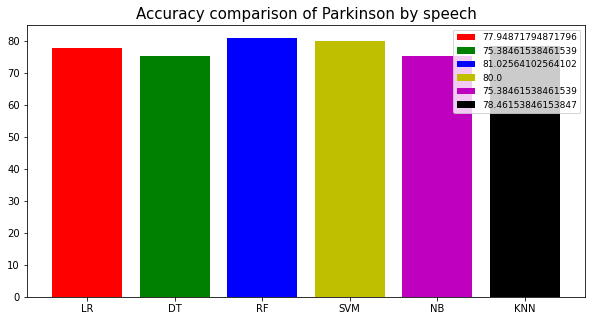

In [24]:
graph()

In [25]:
import tkinter
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np
root = tkinter.Tk()
root.wm_title("Accuracy plot for Parkinson disease by speech")
fig = Figure(figsize=(10,10),dpi=1)
canvas = FigureCanvasTkAgg(fig, master=root)  
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
icon=tkinter.PhotoImage(file='speech.png')   
label=tkinter.Label(root,image=icon)
label.pack()
root.mainloop()